# 2D Plume in Regional Flow with 1st-Order Decay (Wilson and Miller Solution)

The sketch depicts a vertical line source in an aquifer of infinite extent located at (x,y)=(0,0) some time after constant injection has begun. 

![](huntsetup.png)

For the line source (injection well) whose fluid contribution makes negligible impact on the local hydraulics as depicted in the sketch the initial, boundary, and mass conservation conditions are:

$$C(x,y,0)=0$$
$$C(\pm \infty,\pm \infty,t)=0$$
$$\int_{- \infty}^{\infty}\int_{-\infty}^{\infty}C(x,y,t)dxdy = C_0 Q t$$

A solution obtained by time-convolution of an elementary line source solution with 1st order decay term is (Wilson and Miller, 1978) is 

$$C(x,y,t) = \frac{C_0 Q}{4 \pi n L}\frac{1}{\sqrt{D_x D_y}}exp(\frac{x v}{2 D_x})W(u,\frac{r}{B})$$

where $W(u,\frac{r}{B})$ is the leaky aquifer (Hantush) well function with

$$B=\frac{2D_x}{v}$$

$$d=1+\frac{2B\lambda}{v}$$

$$r= {\sqrt{(x^2+y^2\frac{D_x}{D_y})d}}$$

$$u=\frac{r^2}{4 d D_x t}$$





The solution is presented in (Bear and Cheng, 2010) as 

![](wilsonmiller2.png)
![](wilsonmiller1.png)
a convolution integral (eqn. 10.6.38, p. 634) (the end user needs to supply the integration routine); Hunt (1978) noticed that the integral was the leaky well function with appropriate substitutions and completed the solution.

The leaky aquifer function can be evaluated numerically using a recursive definition, or efficient approximations can be used. Listings for these approximations appear below after the references


The solution is applicable for porous media flow, where the velocity (below) is the mean section velocity (seepage velocity divided by the porosity). The solution can also be used with streams and pipes (porosity = 1). Negative values of distance in x-axis would correspond to locations upgradient of the injection location.

Scripts to generate solutions are listed below:

## Leaky Well Function

In [1]:
def wh(u, rho): # Hantush Leaky aquifer well function
    import numpy
    """Returns Hantush's well function values

    Note: works only for scalar values of u and rho

    Parameters:
    -----------
    u : scalar  (u= r^2 * S / (4 * kD * t))
    rho : sclaar (rho =r / lambda, lambda = sqrt(kD * c))
    Returns:
    --------
    Wh(u, rho) : Hantush well function value for (u, rho)
    """
    try:
        u =float(u)
        rho =float(rho)
    except:
        print("u and rho must be scalars.")
        raise ValueError()

    LOGINF = 2
    y = numpy.logspace(numpy.log10(u), LOGINF, 1000)
    ym = 0.5 * (y[:-1]+  y[1:])
    dy = numpy.diff(y)
    wh = numpy.sum(numpy.exp(-ym - (rho / 2)**2 / ym ) * dy / ym)
    return(wh)

## Wilson and Miller Solution (Prototype Function)

In [2]:
def willsonmiller(c_injection,q_injection,l_thickness,d_x,d_y,decay,velocity,x_location,y_location,time):
    import math
    B   = 2*d_x/velocity
    d   = 1+2*B*decay/velocity
    rsq = (x_location**2 + (y_location**2)*(d_x/d_y))*d
    r   = math.sqrt(rsq)
    u   = rsq/(4.0*d*d_x*time)
#    print(rsq,rrr,aaa,bbb)
    term1 = c_injection*q_injection/(4.0*math.pi*l_thickness)
    term2 = 1.0/(math.sqrt(d_x*d_y))
    term3 = math.exp((x_location*velocity)/(2.0*d_x))
    term4 = wh(u,r/B)

    #if term4 <= 0.0: term4 = 0.0
#    print(term1,term2,term3,term4)
    willsonmiller = term1*term2*term3*term4
    return willsonmiller

## Driver Script

In [3]:
# inputs
c_injection = 133
q_injection = 3.66
l_thickness = 1.75
d_x = 0.920
d_y = 0.092
decay = 0.0024 # added 1st order decay
velocity = 0.187
x_location = 123
y_location = 0
time = 36500
scale = c_injection*q_injection
output = willsonmiller(c_injection,q_injection,l_thickness,d_x,d_y,decay,velocity,x_location,y_location,time)
print("Concentration at x = ",round(x_location,2)," y= ",round(y_location,2) ," t= ",round(time,2) ," = ",round(output,3))
#

Concentration at x =  123  y=  0  t=  36500  =  11.394


## Plotting Script

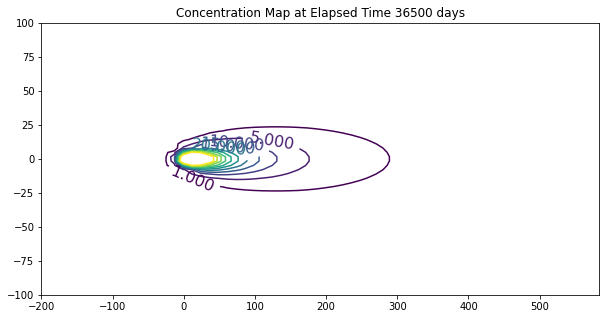

In [4]:
# make a plot
x_max = 200
y_max = 100
# build a grid
nrows = 50   
deltax = (x_max*4)/nrows
x = []
x.append(-x_max)
for i in range(nrows):
    if x[i] == 0.0:
        x[i] = 0.00001
    x.append(x[i]+deltax)

ncols = 50   
deltay = (y_max*2)/(ncols-1)
y = []
y.append(-y_max)
for i in range(1,ncols):
    if y[i-1] == 0.0:
        y[i-1] = 0.00001
    y.append(y[i-1]+deltay)
    
#y

#y = [i*deltay for i in range(how_many_points)] # constructor notation
#y[0]=0.001
ccc = [[0 for i in range(nrows)] for j in range(ncols)]

for jcol in range(ncols):
    for irow in range(nrows):
        ccc[irow][jcol] = willsonmiller(c_injection,q_injection,l_thickness,d_x,d_y,decay,velocity,x[irow],y[jcol],time)
        
#y

my_xyz = [] # empty list
count=0
for irow in range(nrows):
    for jcol in range(ncols):
        my_xyz.append([ x[irow],y[jcol],ccc[irow][jcol] ])
       # print(count)
        count=count+1
        
#print(len(my_xyz))

import pandas
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz[0].values.tolist() # column 0 of dataframe
coord_y = my_xyz[1].values.tolist() # column 1 of dataframe
coord_z = my_xyz[2].values.tolist() # column 2 of dataframe
#print(min(coord_x), max(coord_x)) # activate to examine the dataframe
#print(min(coord_y), max(coord_y))
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 64)
lat = numpy.linspace(min(coord_y), max(coord_y), 64)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(10, 5)
CS = ax.contour(X, Y, Z, levels = [1,5,10,15,20,25,30,35,40,45,50])
ax.clabel(CS, inline=2, fontsize=16)
ax.set_title('Concentration Map at Elapsed Time '+ str(round(time,1))+' days');


## Spreadsheet Model

A spreadsheet implementation is available at [http://54.243.252.9/ce-5364-webroot/6-Spreadsheets/WilsonMillerModel.xlsm](http://54.243.252.9/ce-5364-webroot/6-Spreadsheets/WilsonMillerModel.xlsm)  

:::{note}
This model requires Analysis Tool Pack Add-In and the VBA Macro Enabled.
::::

<!--
from scipy import *
from scipy import special
from scipy.special import kn as BesselK
#from scipy.special import expn as ExpInt
from math import sqrt as sqrt
from math import cosh as cosh
from math import log as ln # in python: log(x)=Ln(x)
import numpy

def ExpInt(n,u):

    # n wordt niet gebruikt

    # Fast approximation for Wu according to equation 7a and 7b from Srivastava(1998)
    gamma = 0.5772 # Euler-Macheroni constant

    # Wu for u<1
    u0  = numpy.where(u<1.0,u,1) # u=1 is just a dummy to make ln() work on all values
    Wu0 = numpy.lib.scimath.log(numpy.exp(-gamma)/u0) + 0.9653*u - 0.1690*u0**2

    #Wu for u>=1
    u1 = numpy.where(u>=1.0,u,1) # u=1 is just a dummy to make ln() work on all values
    Wu1 = 1/(u1*numpy.exp(u1))*(u1+0.3575)/(u1+1.280)

    # combine Wu0 and Wu1
    Wu = numpy.where(u<1.0,Wu0,Wu1)
    return Wu

def func_F(rho,tau):
# func_F is a fast approximation of Hantush well function W

    # Calculate parameter w
    w = (ExpInt(1,rho)-BesselK(0,rho))/(ExpInt(1,rho)-ExpInt(1,rho/2))

    # Calculate F(rho,tau)
    if tau <= 0:
        F = w*ExpInt(1,rho/2*e**(-tau))-(w-1)*ExpInt(1,rho*cosh(tau))
    else:
        F = 2*BesselK(0,rho) - w*ExpInt(1,rho/2*e**tau) + (w-1)*ExpInt(1,rho*cosh(tau))

    # return calculated value of F(rho,tau)
    return F
-->

## References

1. [Wilson, J.L. and Miller, P.J. (1978) Two-dimensional plumes in uniform groundwater flow. J. Hyd. Div., ASCE, 104:503–514, 1978.](https://ascelibrary.org/doi/10.1061/JYCEAJ.0004975)
3. [Yuan, D, (1995)  *Accurate approximations for one-, two-, and three-dimensional groundwater mass transport from an exponentially decaying contaminant source.* MS Thesis, Department of Civil and Environmental Engineering, University of Houston. ](http://54.243.252.9/about-me-webroot/about-me/MyWebPapers/thesis/yuan_thesis/Groundwater_transport.pdf)
4. [Chuang, Lu-Chia, (1998) *A guidance system for choosing analytical contaminant transport models.* Doctoral Dissertation, Department of Civil and Environmental Engineering, University of Houston, Houston, Texas. 222p.](http://54.243.252.9/about-me-webroot/about-me/MyWebPapers/thesis/ants_dissertation/Luke_Chuang.pdf)
5. [Analytical solutions for one-, two-, and three-dimensional solute transport in ground-water systems with uniform flow
Open-File Report 89-56](https://pubs.usgs.gov/publication/ofr8956)
6. [Analytical solutions for one-, two-, and three-dimensional solute transport in ground-water systems with uniform flow
Techniques of Water-Resources Investigations 03-B7 (supercedes above reference)](https://pubs.usgs.gov/publication/twri03B7)